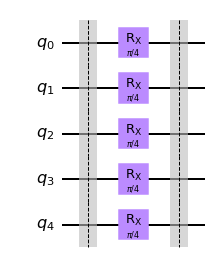

In [33]:

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit import Parameter
from numpy import pi

qreg_q = QuantumRegister(5, 'q')
qreg_q_mix = QuantumRegister(5, 'q') 
qreg_q_combined = QuantumRegister(5, 'q') 
 # creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q)  #, creg_c)
circuit_mix = QuantumCircuit(qreg_q_mix)
circuit_combined = QuantumCircuit(qreg_q_combined)

beta = pi/4;  # Parameter('β')
gamma = pi/8;  # Parameter('γ')

# circuit.h(qreg_q[0])
# circuit.h(qreg_q[1])
# circuit.h(qreg_q[2])
# circuit.h(qreg_q[3])
# circuit.h(qreg_q[4])
circuit_mix.barrier(qreg_q_mix[4])
circuit_mix.barrier(qreg_q_mix[3])
circuit_mix.barrier(qreg_q_mix[2])
circuit_mix.barrier(qreg_q_mix[0])
circuit_mix.barrier(qreg_q_mix[1])
circuit_mix.rx(beta, qreg_q_mix[4])
circuit_mix.rx(beta, qreg_q_mix[3])
circuit_mix.rx(beta, qreg_q_mix[2])
circuit_mix.rx(beta, qreg_q_mix[1])
circuit_mix.rx(beta, qreg_q_mix[0])
circuit_mix.barrier(qreg_q_mix[0])
circuit_mix.barrier(qreg_q_mix[1])
circuit_mix.barrier(qreg_q_mix[2])
circuit_mix.barrier(qreg_q_mix[3])
circuit_mix.barrier(qreg_q_mix[4])

circuit.cx(qreg_q[0], qreg_q[1])
circuit.rz(gamma, qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.rz(gamma, qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.barrier(qreg_q[0])
circuit.rz(gamma, qreg_q[2])
circuit.barrier(qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.barrier(qreg_q[0])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[1])
circuit.rz(gamma, qreg_q[3])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.cx(qreg_q[2], qreg_q[4])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.rz(gamma, qreg_q[4])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.cx(qreg_q[2], qreg_q[4])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[2])
circuit.rz(gamma, qreg_q[4])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[2])
circuit.barrier(qreg_q[4])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[2])
circuit.barrier(qreg_q[3])
# circuit.measure(qreg_q[0], creg_c[0])
# circuit.measure(qreg_q[1], creg_c[0])
# circuit.measure(qreg_q[2], creg_c[0])
# circuit.measure(qreg_q[3], creg_c[0])
# circuit.measure(qreg_q[4], creg_c[0])


# binder needed
# circuit = circuit.bind_parameters({gamma: pi/4})
# circuit_mix = circuit_mix.bind_parameters({beta: pi/8})

# circuit_combined = circuit_mix + circuit
circuit_combined.compose(circuit_mix)
circuit_combined.compose(circuit)
# circuit_combined = circuit_combined.bind_parameters({gamma: pi/4, beta: pi/8})


circuit_mix.draw('mpl')




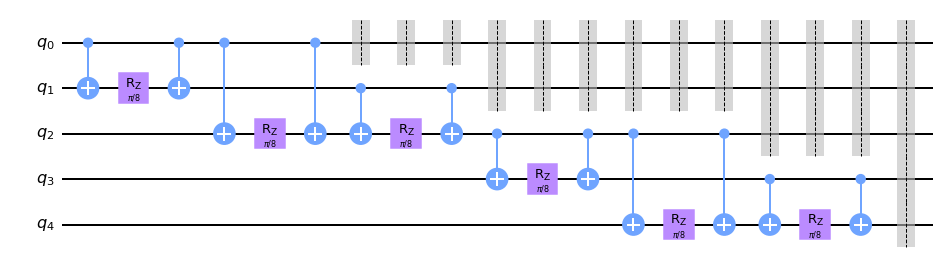

In [34]:
circuit.draw('mpl')

(0.8900547762521491+0.014010672786499201j) * IIIII
+ (-0.033824756259137195-0.17733104339604597j) * IIIZZ
+ (-0.03382475625913724-0.17733104339604594j) * IIZIZ
+ (-0.03382475625913724-0.17733104339604594j) * IIZZI
+ (-0.03382475625913732+0.014010672786498885j) * IZIIZ
+ (-0.03382475625913732+0.014010672786498885j) * IZIZI
+ (-0.03382475625913724-0.17733104339604597j) * IZZII
+ (-0.03382475625913732+0.014010672786498896j) * IZZZZ
+ (-0.033824756259137334+0.014010672786498885j) * ZIIIZ
+ (-0.033824756259137334+0.014010672786498885j) * ZIIZI
+ (-0.033824756259137244-0.17733104339604594j) * ZIZII
+ (-0.03382475625913733+0.014010672786498903j) * ZIZZZ
+ (-0.033824756259137244-0.177331043396046j) * ZZIII
+ (-0.03382475625913731+0.014010672786498882j) * ZZIZZ
+ (-0.03382475625913732+0.01401067278649889j) * ZZZIZ
+ (-0.03382475625913732+0.01401067278649889j) * ZZZZI


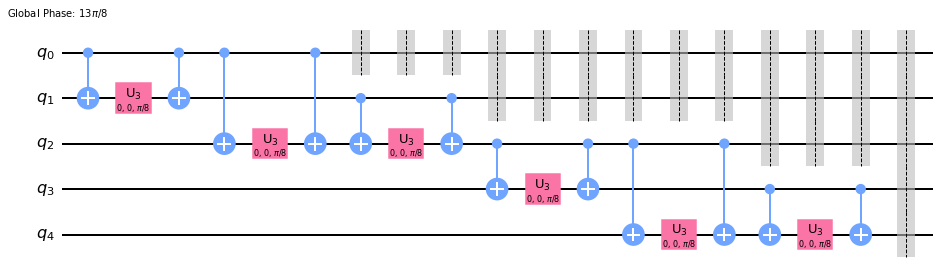

In [35]:
from qiskit.opflow import Z, I, X, OperatorBase, CircuitOp, PauliOp

circuit_decomposed = circuit.decompose().decompose()
circuit_decomposed_paulies = CircuitOp(circuit_decomposed).to_pauli_op().reduce()
print(circuit_decomposed_paulies)
circuit_decomposed.draw('mpl')


In [36]:

from qiskit.opflow import Z, I, X, OperatorBase, CircuitOp, PauliOp


from qiskit.algorithms import QAOA
from qiskit.algorithms.optimizers import COBYLA
# from qiskit.opflow
from qiskit.utils import QuantumInstance
from qiskit import Aer
from qiskit.quantum_info.operators import Operator

backend = Aer.get_backend('aer_simulator')

qinstance=QuantumInstance(backend, shots=1, skip_qobj_validation=False)

# My assumption: here intial, observable and mixer all in one place
# Here it expects pure pauli
# have to bring the circuit to pure pauli manually
observable = circuit_decomposed_paulies # CircuitOp(circuit.decompose().decompose()).to_pauli_op().reduce()  # Not Implemented => .to_pauli_op()  # PauliOp( equivalent to "Sum (I - Z^Z)/2
mixed = CircuitOp(circuit_mix)  # .to_pauli_op();
observable_comb = CircuitOp(circuit_combined); 


qaoa = QAOA(optimizer=COBYLA(), quantum_instance=qinstance)  # , mixer=mixed)
result = qaoa.compute_minimum_eigenvalue(observable)  # ValueError: Expectations of Mixed Operators not yet supported.
# result = qaoa.compute_minimum_eigenvalue(observable_comb)  #  TypeError: ParameterExpression with unbound parameters ({Parameter(c)}) cannot be cast to a float.
 
print(result)

ValueError: Operator contains complex coefficients, which are not supported.

Simpler paulis example

In [43]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit.opflow import Z, I, X, OperatorBase, CircuitOp, PauliOp


qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q)  #, creg_c)

# circuit.reset(qreg_q[0])
# circuit.reset(qreg_q[1])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
paulies = CircuitOp(circuit).to_pauli_op().reduce()
print(paulies)
circuit.draw('text')
#circuit.measure(qreg_q[2], creg_c[0])
# @columns [0,0,2,3]

0.75 * III
+ 0.25 * IIZ
+ 0.25 * IZI
- 0.25 * IZZ
+ 0.25 * XII
- 0.25 * XIZ
- 0.25 * XZI
+ 0.25 * XZZ


q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘